# U-Net 

(baseline model)

In [1]:
pwd

'/data1/kishoretarafdar/FILESHARE/MEDCNN2DSimplifiedTutorial'

In [2]:
!python --version

Python 3.12.7


GPU availability?

In [3]:
import tensorflow as tf
print(f"TensorFlow version {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

2025-04-04 19:08:38.172305: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743773918.193138 3679086 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743773918.199820 3679086 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-04 19:08:38.222471: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version 2.18.0
Num GPUs Available:  3


3

Select one GPU

        Restrict code to use a particular GPU...

In [4]:
# # include ../dirx 
mylibpath = [
    '/data1/kishoretarafdar/FILESHARE/MEDCNN2DSimplifiedTutorial/utils',
    '/data1/kishoretarafdar/FILESHARE/MEDCNN2DSimplifiedTutorial/models'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from tf_select_a_gpu import select_a_gpu

In [5]:
# select_gpu = gpus[gpu_id]
memory_limit = 16 #GB
select_a_gpu(gpus, gpu_id = 1, memory_limit=memory_limit)
# del gpu_id, select_a_gpu, select_gpu

3 Physical GPUs available 
Selected 1 Logical GPU with 16 GB memory limit


I0000 00:00:1743773920.730104 3679086 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 16384 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:23:00.0, compute capability: 8.6


In [6]:
# !nvidia-smi

In [7]:
49140//1024

47

In [8]:
# !python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [9]:
# pip install tqdm
# pip install scikit-learn
# pip install scikit-image
# pip install nibabel
# pip install matplotlib

In [ ]:
# import tensorflow as tf
import keras
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from IPython import display
import time

# from tensorflow.keras.layers import Concatenate
# from keras.utils import plot_model 
# from tqdm import tqdm 
# import nibabel as nib




        load utils..

In [ ]:
from utils import elapsedtime, timestamp
from BoundaryAwareDiceLoss import BoundaryAwareDiceLoss
from Load2Ddata import load_ibsr_XY
from TTViterators import get_train_test_val_iterators
from dice import dice_coef
from compile1 import compile_model
from Train1 import train

# # from DWTIDWT2Dtfv1 import DWT2D, IDWT2D
# from TFDWT3D.DWTIDWT2Dtfv1 import DWT2D, IDWT2D
# from DWTselfAttention2D import DWTselfAttention
# from tensorflow.keras.layers import Concatenate



In [12]:
# ls /home/kishoretarafdar/

In [13]:
start_time=time.time()

# Time elapsed
end_time = time.time()
print(elapsedtime(start_time, end_time))
del start_time, end_time

Elapsed time: mm:ss:mss 	 00:00:000
00:00:000


In [14]:
timestamp(time.time())

2025-04-04 19:08:41.669872


'20250404'

In [15]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

IoU as loss (approx.)  $IoU'=\frac{|T*P|}{|T+P-(T*P)|}=\frac{I}{U}$

$Dice=\frac{2*Intersection}{Union+Intersection}$

Boundary aware dice loss



---

# Data loader

## Option 3 Load complete IBSR

Actual training data

In [16]:
pwd

'/data1/kishoretarafdar/FILESHARE/MEDCNN2DSimplifiedTutorial'

In [17]:
ls /data1/kishoretarafdar/FILESHARE/IBSR_cookedXY_allplanes/IBSR_XY_skullstripping

IBSR_X.npy*  IBSR_Y.npy*


In [18]:
datapath = '/data1/kishoretarafdar/FILESHARE/IBSR_cookedXY_allplanes/IBSR_XY_skullstripping'
X, Y, dataset = load_ibsr_XY(datapath)
X.shape, Y.shape, dataset

((7056, 256, 256, 1), (7056, 256, 256, 1), 'IBSR')

In [19]:
# X, Y = X[0:88,...], Y[0:88,...]

In [20]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

## Train Test split

In [21]:
# from TTViterators import get_train_test_val_iterators
train_iterator, test_iterator, val_iterator = get_train_test_val_iterators(X,Y)

True (5644, 256, 256, 1)
(5644, 256, 256, 1) (5644, 256, 256, 1) float32 float32 <class 'numpy.ndarray'> <class 'numpy.ndarray'> (1412, 256, 256, 1) (1412, 256, 256, 1) float32 float32 <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Train  True (5079, 256, 256, 1) True float32
Val    True (565, 256, 256, 1) True float32
Test.  True (1412, 256, 256, 1) True float32


In [22]:
# tmp
# from TTViterators import get_train_test_val_iterators
#train_iterator, test_iterator, val_iterator = get_train_test_val_iterators(X[0:6,:,:,:],Y[0:6,:,:,:])

In [23]:
# # Normalization (assumned inside model)
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(...)
# datagen.fit(X_train)

In [24]:
# batch_size = 20
# train_iterator = datagen.flow(X_train, Y_train, batch_size=batch_size)
# val_iterator = datagen.flow(X_val, Y_val, batch_size=batch_size)
# test_iterator = datagen.flow(X_test, Y_test, batch_size=batch_size)

In [25]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
# next(train_iterator).shape

# Load and compile model

In [37]:
from models.Unet2D import Unet2D, uconfigs

In [38]:
pwd

'/data1/kishoretarafdar/FILESHARE/MEDCNN2DSimplifiedTutorial/traininglogs'

In [28]:
# mkdir traininglogs

In [39]:
cd traininglogs

[Errno 2] No such file or directory: 'traininglogs'
/data1/kishoretarafdar/FILESHARE/MEDCNN2DSimplifiedTutorial/traininglogs


In [40]:
ls -lart

total 24916
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar  1279462 Apr  4 17:32 20250404G_IBSR_nonResidual_bce_config3456.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       55 Apr  4 17:33 G3456.dir
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     5576 Apr  4 17:33 G3456.dat
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       55 Apr  4 17:33 G3456.bak
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar   699161 Apr  4 18:52 20250404G_IBSR_nonResidual_bce_configminimal2.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     3124 Apr  4 18:54 Gminimal2.dat
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 18:54 Gminimal2.dir
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 18:54 Gminimal2.bak
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar 23471783 Apr  4 18:57 20250404G_IBSR_nonResidual_bce_config4567.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     3016 Apr  4 18:59 train_result.pkl
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 18:59 test_result.pk

In [41]:
# CONFIGKEY= '4567'
# CONFIGKEY= '3456'
# model, segconfig = Unet2d(config=configs[CONFIGKEY], compile=False), 'nonResidual' 
# model, segconfig = Gφψ(config=configs[CONFIGKEY], compile=False), 'nonResidual' 
CONFIGKEY = '45678',
model, segconfig = Unet2D(config=uconfigs['45678'], compile=False), 'nonResidual' 
model, lossname = compile_model(model, dataset, dice_coef)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 256, 256,  │          0 │ input_layer_1[0]… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 256, 256,  │        160 │ lambda_1[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 256, 256,  │          0 │ conv2d_19[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 256, 256,  │      2,320 │ dropout_9[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 128, 128,  │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 128, 128,  │          0 │ conv2d_21[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │      9,248 │ dropout_10[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64, 64,    │          0 │ conv2d_23[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │     36,928 │ dropout_11[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 32, 32,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 32, 32,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 32, 32,    │          0 │ conv2d_25[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 32, 32,    │    147,584 │ dropout_12[0][0]

 Total params: 1,940,834 (7.40 MB)

 Trainable params: 1,940,834 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [32]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# Train one model

In [42]:
pwd

'/data1/kishoretarafdar/FILESHARE/MEDCNN2DSimplifiedTutorial/traininglogs'

In [43]:
ls -lart

total 24916
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar  1279462 Apr  4 17:32 20250404G_IBSR_nonResidual_bce_config3456.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       55 Apr  4 17:33 G3456.dir
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     5576 Apr  4 17:33 G3456.dat
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       55 Apr  4 17:33 G3456.bak
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar   699161 Apr  4 18:52 20250404G_IBSR_nonResidual_bce_configminimal2.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     3124 Apr  4 18:54 Gminimal2.dat
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 18:54 Gminimal2.dir
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 18:54 Gminimal2.bak
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar 23471783 Apr  4 18:57 20250404G_IBSR_nonResidual_bce_config4567.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     3016 Apr  4 18:59 train_result.pkl
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 18:59 test_result.pk

In [44]:
dataset, lossname, segconfig, CONFIGKEY

('IBSR', 'bce', 'nonResidual', ('45678',))

In [ ]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

2025-04-04 19:16:06.844116
Epoch 1/40


/data1/kishoretarafdar/miniforge3/envs/tf218/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/data1/kishoretarafdar/miniforge3/envs/tf218/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_44']. Received: the structure of inputs=*
  warnings.warn(
E0000 00:00:1743774371.631788 3679086 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1_1/dropout_9_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1743774372.160492 3679429 cuda_dnn.cc:529

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - IoU: 0.7563 - accuracy: 0.8578 - dice_coef: 0.8195 - loss: 0.3221
Epoch 1: val_loss improved from inf to 0.19197, saving model to 20250404G_IBSR_nonResidual_bce_config('45678',).keras
254/254 ━━━━━━━━━━━━━━━━━━━━ 79s 229ms/step - IoU: 0.7566 - accuracy: 0.8580 - dice_coef: 0.8198 - loss: 0.3217 - val_IoU: 0.8693 - val_accuracy: 0.9301 - val_dice_coef: 0.9171 - val_loss: 0.1920
Epoch 2/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - IoU: 0.9322 - accuracy: 0.9649 - dice_coef: 0.9601 - loss: 0.0864
Epoch 2: val_loss improved from 0.19197 to 0.08590, saving model to 20250404G_IBSR_nonResidual_bce_config('45678',).keras
254/254 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - IoU: 0.9322 - accuracy: 0.9649 - dice_coef: 0.9601 - loss: 0.0864 - val_IoU: 0.9331 - val_accuracy: 0.9654 - val_dice_coef: 0.9602 - val_loss: 0.0859
Epoch 3/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - IoU: 0.9472 - accuracy: 0.9729 - dice_coef: 0.9692 - loss: 0.0655
Epoch 3: val_

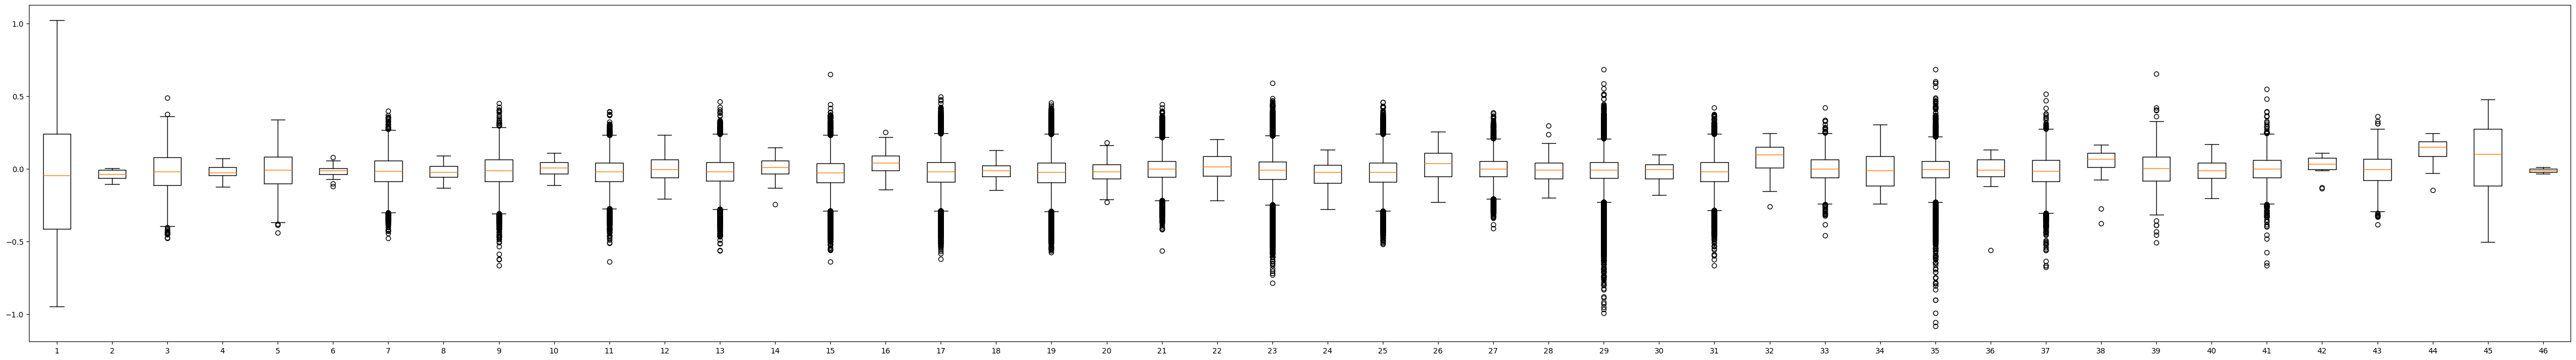

Elapsed time: mm:ss:mss 	 23:59:977


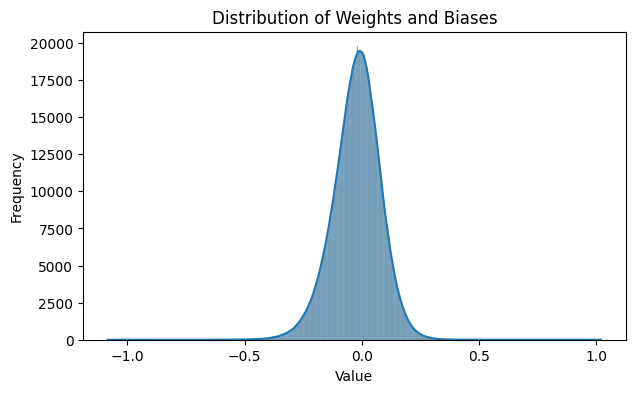

In [45]:
from Train1 import train
epochs = 40
train(model, train_iterator, test_iterator, val_iterator, dataset=dataset, segconfig=segconfig , lossname=lossname, CONFIGKEY=CONFIGKEY, epochs=epochs)


# Assuming `model` is your trained U-Net model
model_weights = model.get_weights()
all_weights = np.concatenate([w.flatten() for w in model_weights])
import seaborn as sns

# Plotting the histogram
plt.figure(figsize=(7, 4))
sns.histplot(all_weights, bins=900, kde=True)
plt.title('Distribution of Weights and Biases')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [46]:
model_weights = model.get_weights()
[_.shape for _ in model_weights]
[_.dtype for _ in model_weights]

[dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32')]

In [47]:
a = [_ for _ in model_weights if len(_.shape)>1 and _.shape[0]>1]
[_.shape for _ in a]

[(3, 3, 1, 16),
 (3, 3, 16, 16),
 (3, 3, 16, 32),
 (3, 3, 32, 32),
 (3, 3, 32, 64),
 (3, 3, 64, 64),
 (3, 3, 64, 128),
 (3, 3, 128, 128),
 (3, 3, 128, 256),
 (3, 3, 256, 256),
 (2, 2, 128, 256),
 (3, 3, 256, 128),
 (3, 3, 128, 128),
 (2, 2, 64, 128),
 (3, 3, 128, 64),
 (3, 3, 64, 64),
 (2, 2, 32, 64),
 (3, 3, 64, 32),
 (3, 3, 32, 32),
 (2, 2, 16, 32),
 (3, 3, 32, 16),
 (3, 3, 16, 16)]

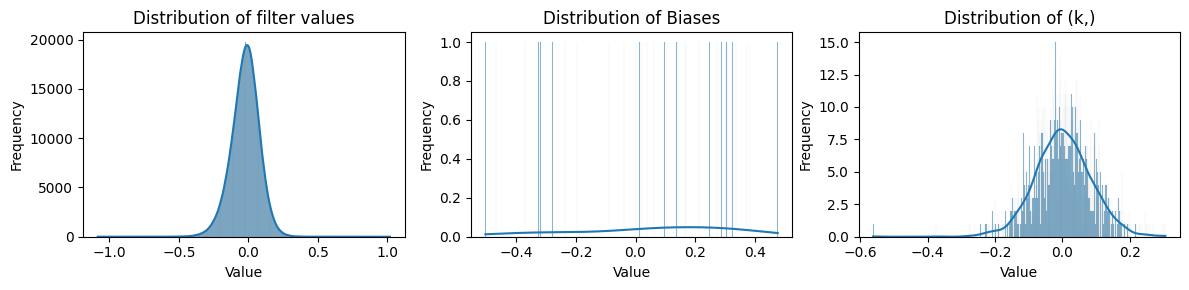

In [48]:
# Assuming `model` is trained U-Net model
model_weights = model.get_weights()
# a = [_ for _ in model_weights if len(_.shape)>1]
a = [_ for _ in model_weights if len(_.shape)>1 and _.shape[0]>1]
b = [_ for _ in model_weights if len(_.shape)>1 and _.shape[0]==1]
c = [_ for _ in model_weights if len(_.shape)==1]
c
# all_weights = np.concatenate([w.flatten() for w in model_weights])
# all_weights.shape


# Assuming `model` is your trained U-Net model
# model_weights = model.get_weights()
# all_weights = np.concatenate([w.flatten() for w in model_weights])
all_filter_vals = np.concatenate([w.flatten() for w in a])
all_bias1 = np.concatenate([w.flatten() for w in b])
all_bias2 = np.concatenate([w.flatten() for w in c])
import seaborn as sns

# Plotting the histogram
plt.figure(figsize=(12, 3))
plt.subplot(131)
sns.histplot(all_filter_vals, bins=900, kde=True)
plt.title('Distribution of filter values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.subplot(132)
sns.histplot(all_bias1, bins=900, kde=True)
plt.title('Distribution of Biases')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.subplot(133)
sns.histplot(all_bias2, bins=900, kde=True)
plt.title('Distribution of (k,)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [49]:
model_weights[2].shape

(3, 3, 16, 16)

In [50]:
model.weights[0][:,:,0,0]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.85380137, -0.01298055,  0.23090038],
       [ 0.33475816, -0.28617987,  0.81669974],
       [-0.6559343 ,  0.48502883, -0.5293681 ]], dtype=float32)>

In [51]:
a[6].shape

(3, 3, 64, 128)

In [52]:
import math

def next_perfect_square(n):
    root = math.ceil(math.sqrt(n))
    return root ** 2

# Given number
# n = 65

# Find the next perfect square
# next_square = next_perfect_square(n)
# next_square

In [53]:
[_.shape for _ in a]

[(3, 3, 1, 16),
 (3, 3, 16, 16),
 (3, 3, 16, 32),
 (3, 3, 32, 32),
 (3, 3, 32, 64),
 (3, 3, 64, 64),
 (3, 3, 64, 128),
 (3, 3, 128, 128),
 (3, 3, 128, 256),
 (3, 3, 256, 256),
 (2, 2, 128, 256),
 (3, 3, 256, 128),
 (3, 3, 128, 128),
 (2, 2, 64, 128),
 (3, 3, 128, 64),
 (3, 3, 64, 64),
 (2, 2, 32, 64),
 (3, 3, 64, 32),
 (3, 3, 32, 32),
 (2, 2, 16, 32),
 (3, 3, 32, 16),
 (3, 3, 16, 16)]

In [54]:
a[9].shape

(3, 3, 256, 256)

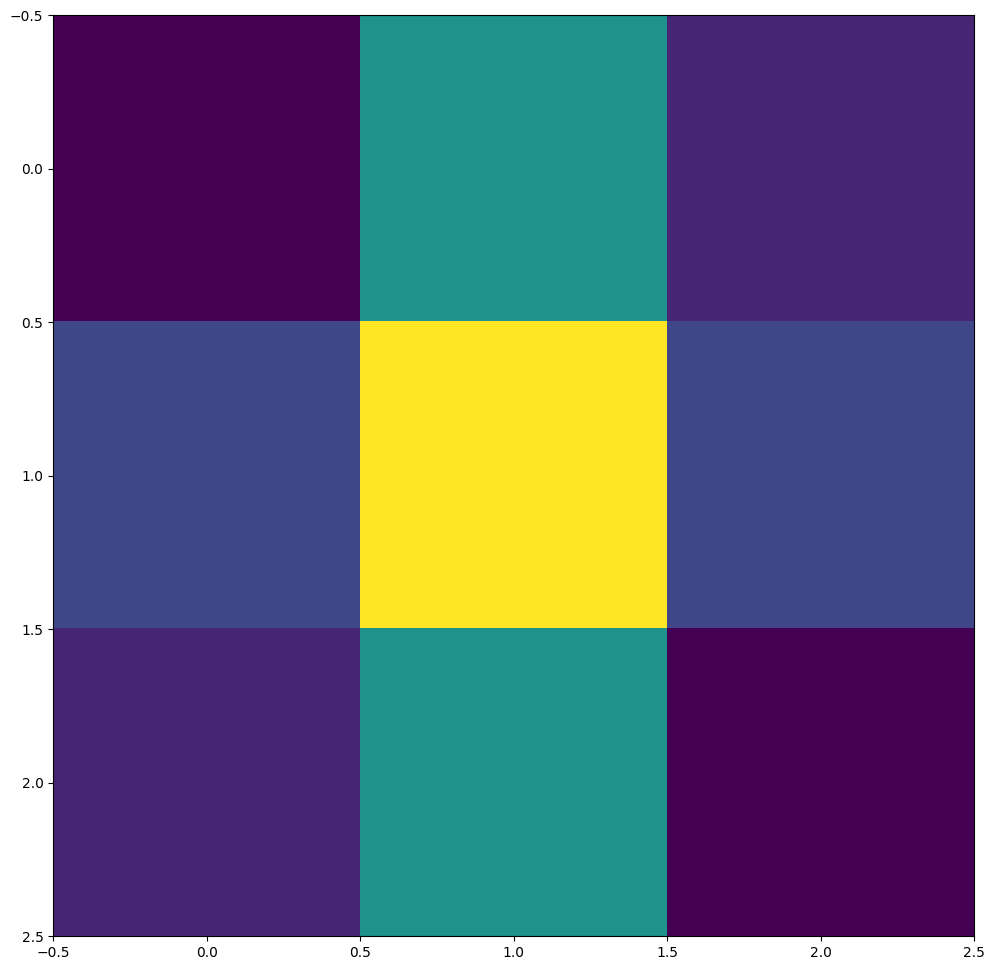

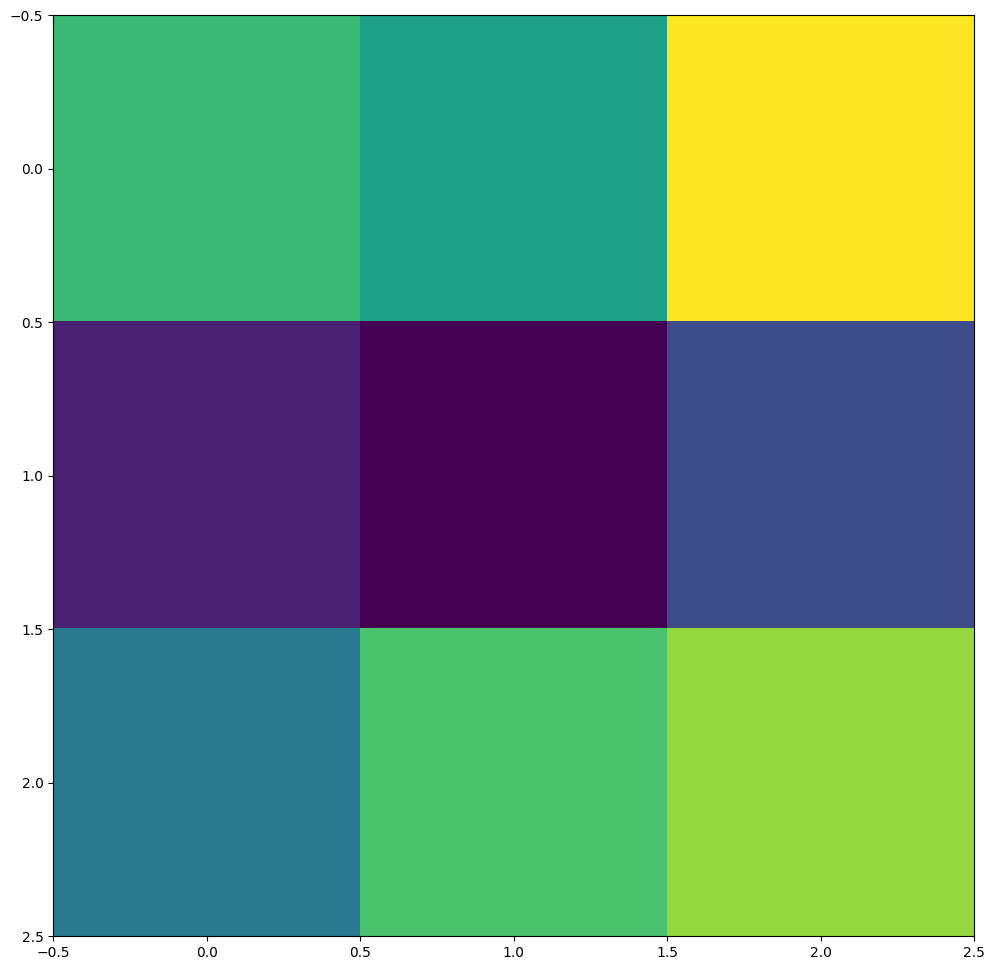

In [ ]:
#MEDCNN plot
idx = 6
ch = 9
_ = a[idx]
grid = int(np.sqrt(next_perfect_square(_.shape[-1])))
plt.figure(figsize=(10,10))
for i in range(_.shape[-1]):
    plt.subplot(grid,grid,i+1)
    # plt.imshow(tf.abs(model.weights[0][:,:,0,i]))
    # plt.imshow(_[:,:,ch,i])#.astype(np.float32))
    plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(_[:,:,ch,i]))))#.astype(np.float32))
    # plt.imshow(np.angle(np.fft.fft2(_[:,:,1,i])))#.astype(np.float32))
plt.tight_layout()


grid = int(np.sqrt(next_perfect_square(_.shape[-1])))
plt.figure(figsize=(10,10))
for i in range(_.shape[-1]):
    plt.subplot(grid,grid,i+1)
    # plt.imshow(tf.abs(model.weights[0][:,:,0,i]))
    plt.imshow(_[:,:,ch,i])#.astype(np.float32))
    # plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(_[:,:,ch,i]))))#.astype(np.float32))
    # plt.imshow(np.angle(np.fft.fft2(_[:,:,1,i])))#.astype(np.float32))
plt.tight_layout()

In [55]:
X_batch, Y_batch = test_iterator.__getitem__(0) 
X_batch.shape, Y_batch.shape

((20, 256, 256, 1), (20, 256, 256, 2))

In [56]:
yhat = model.predict(X_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


/data1/kishoretarafdar/miniforge3/envs/tf218/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_44']. Received: the structure of inputs=*
  warnings.warn(


(20, 256, 256, 1) (20, 256, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


(20, 256, 256, 2) <<
(20, 256, 256) <<


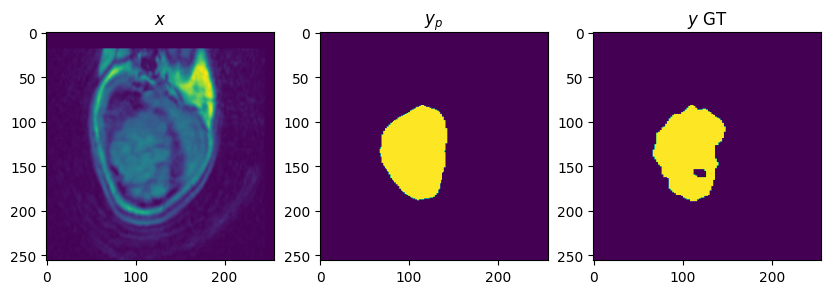

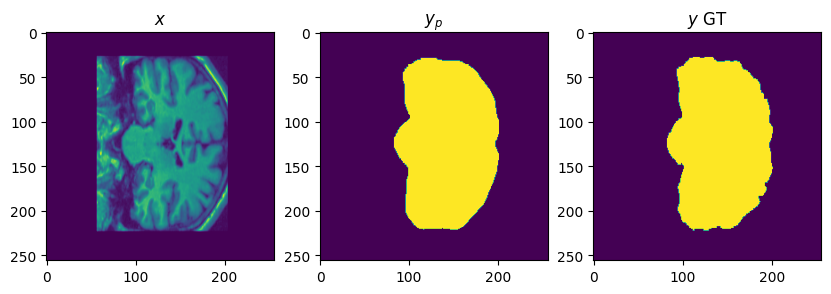

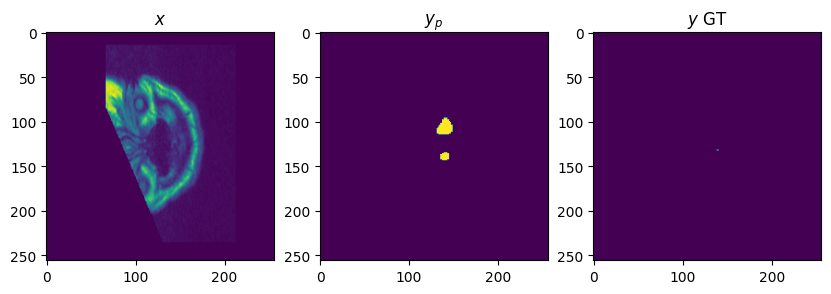

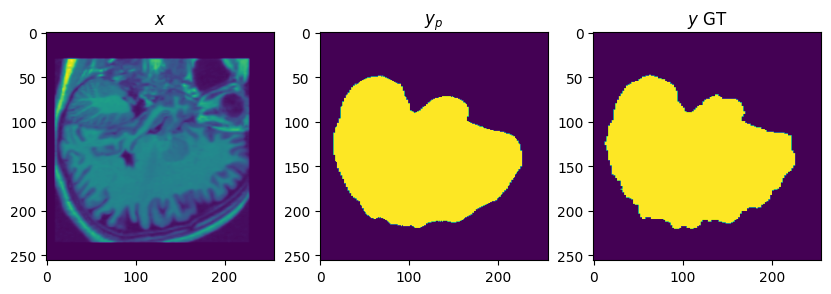

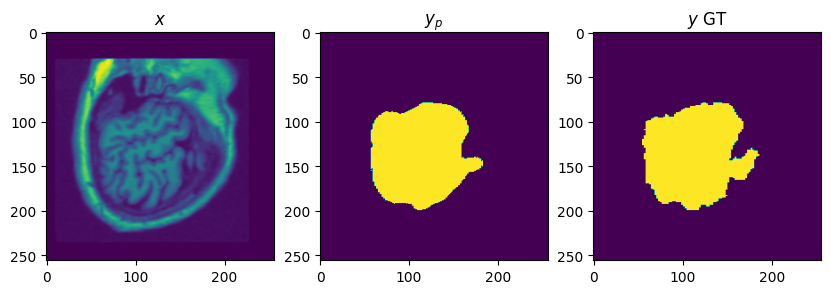

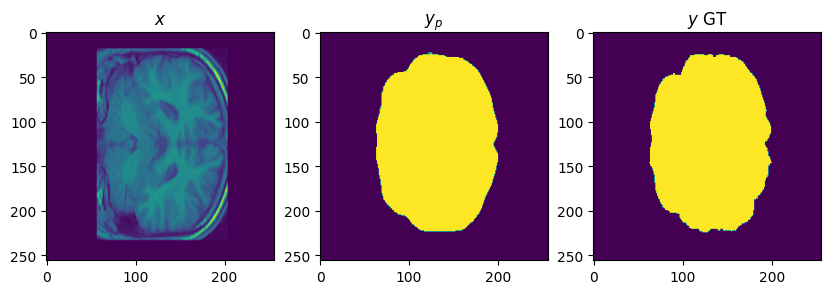

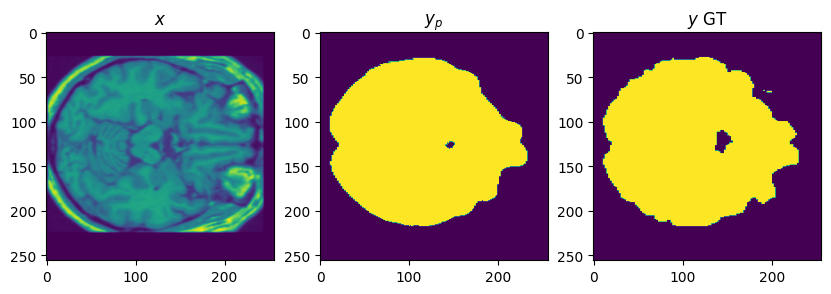

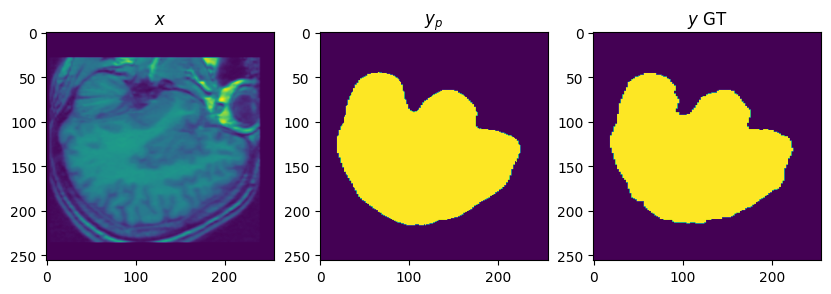

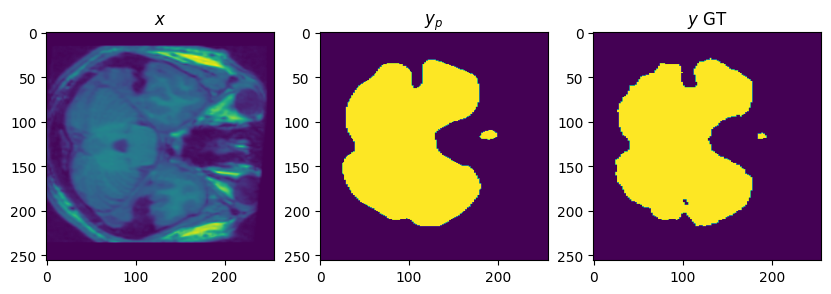

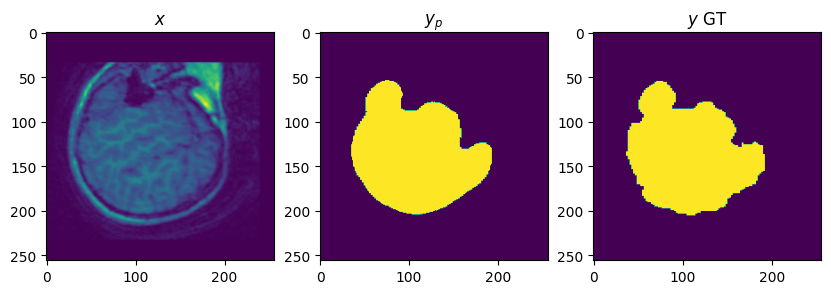

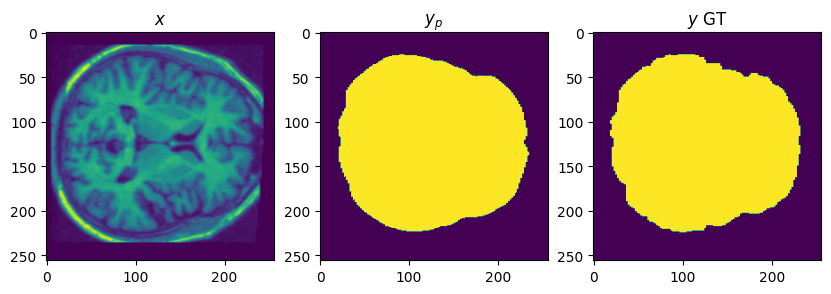

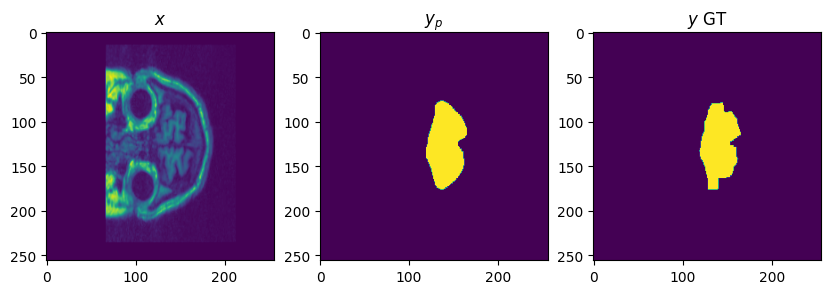

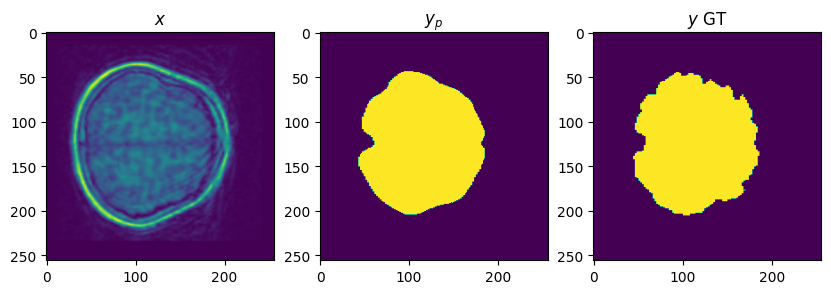

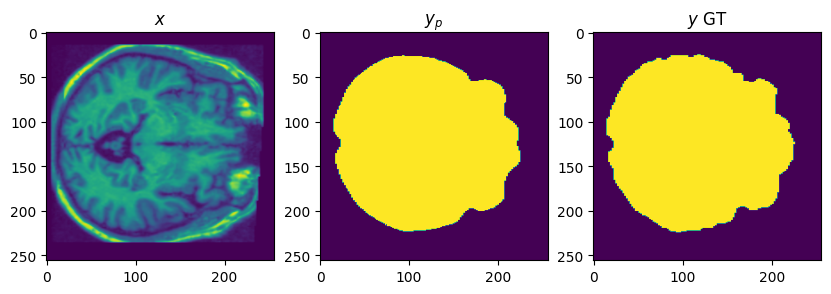

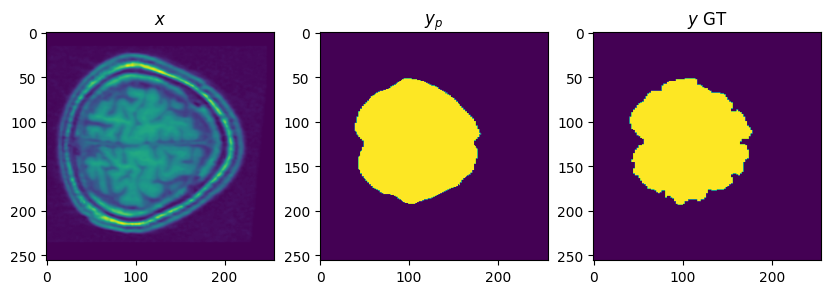

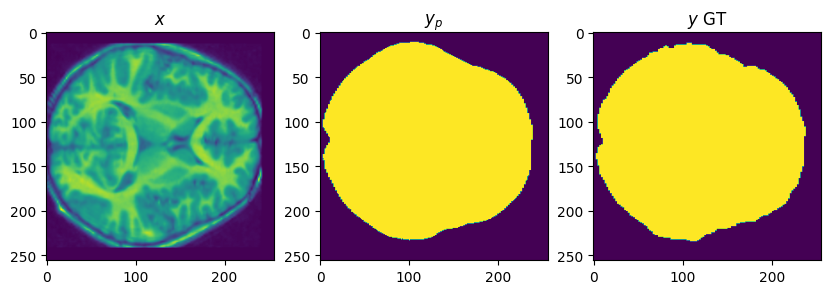

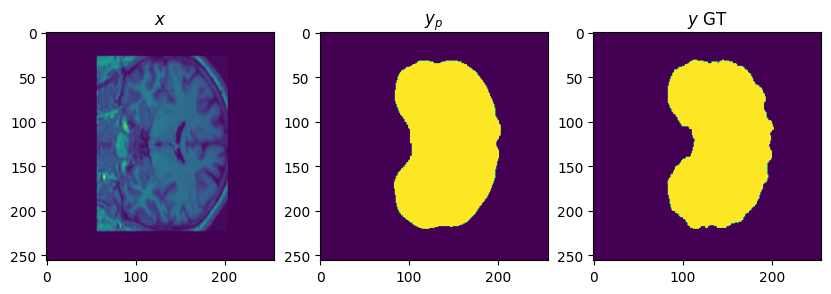

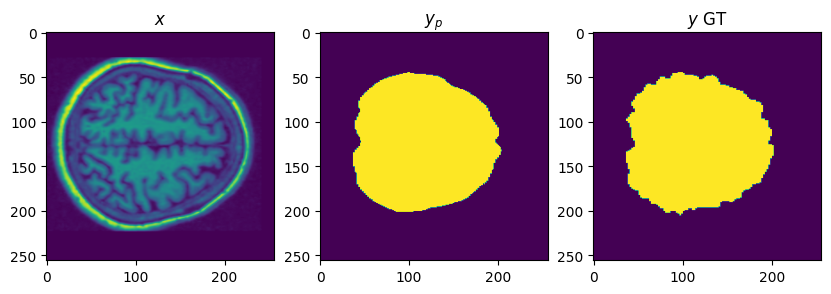

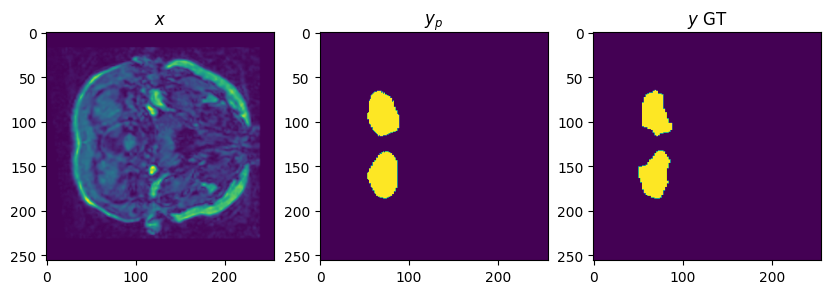

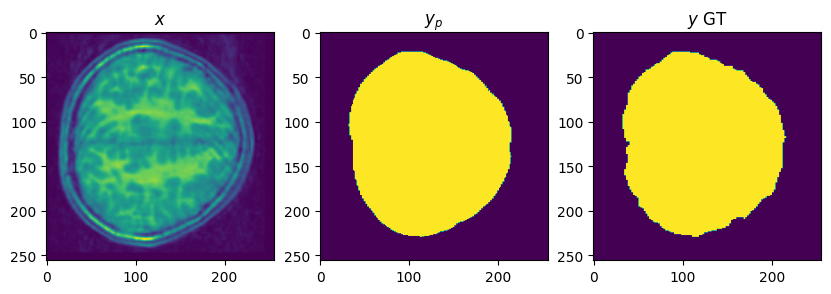

In [57]:
count=0
for batch in test_iterator:
    a, b = batch
    b = np.argmax(b, axis=-1)
    print(a.shape, b.shape)
    yhat = model.predict(a)
    print(yhat.shape,'<<')
    yhat = np.argmax(yhat, axis=-1)
    print(yhat.shape,'<<')


    for k in range(a.shape[0]):
        plt.figure(figsize=(10,3))
        plt.subplot(131), plt.imshow(a[k,:,:,:]), plt.title('$x$')
        plt.subplot(132), plt.imshow(yhat[k,:,:,]), plt.title('$y_p$')
        plt.subplot(133), plt.imshow(b[k,:,:]), plt.title('$y$ GT')
        plt.show()

    count+=1
    if count == 1:
        break